In [2]:
#! pip install pandas_datareader

In [1]:
import pandas_datareader as pdr

In [2]:
key = "3e5bacb7d05d4b327df2263c5db9fcc28f356604"

In [3]:
df = pdr.get_data_tiingo('AAPL', api_key = key)

ConnectionError: HTTPSConnectionPool(host='api.tiingo.com', port=443): Max retries exceeded with url: /tiingo/daily/AAPL/prices?startDate=2016-03-08&endDate=2021-03-07&format=json (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x00000157C1BE8550>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed',))

In [ ]:
df.to_csv("AAPL.csv")

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('AAPL.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-03-07 00:00:00+00:00,101.87,102.83,100.96,102.39,35915810,23.683424,23.906611,23.471861,23.804317,143663240,0.0,1.0
1,AAPL,2016-03-08 00:00:00+00:00,101.03,101.76,100.40,100.78,31182194,23.488135,23.657850,23.341668,23.430013,124728776,0.0,1.0
2,AAPL,2016-03-09 00:00:00+00:00,101.12,101.58,100.27,101.31,27201683,23.509059,23.616003,23.311445,23.553231,108806732,0.0,1.0
3,AAPL,2016-03-10 00:00:00+00:00,101.17,102.24,100.15,101.41,33513577,23.520683,23.769444,23.283547,23.576480,134054308,0.0,1.0
4,AAPL,2016-03-11 00:00:00+00:00,102.26,102.28,101.50,102.24,27408237,23.774094,23.778743,23.597404,23.769444,109632948,0.0,1.0


In [7]:
df1 = df.reset_index()['close']

In [8]:
df1.shape

(1259,)

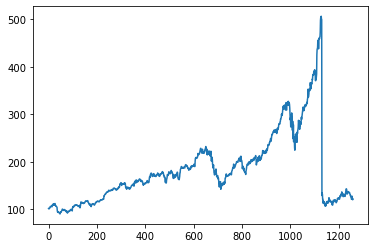

In [9]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [10]:
import numpy as np

In [11]:
# LSTM are very sensitive to scale of data so, we are scalling data in 0-1

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1,1)) # we have done this because scaler needs 2D Array 

In [13]:
# Splitting Dataset into Train & Test
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data, test_data = df1[0:training_size], df1[training_size : len(df1)]

In [14]:
import numpy 

def create_dataset(dataset, time_step=1):   # By Default time step is 1
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
        
    return  numpy.array(dataX), numpy.array(dataY)

In [15]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [16]:
X_train

array([[0.02773301, 0.02571257, 0.02592904, ..., 0.01683704, 0.0152255 ,
        0.03033073],
       [0.02571257, 0.02592904, 0.02604931, ..., 0.0152255 , 0.03033073,
        0.03367408],
       [0.02592904, 0.02604931, 0.02867108, ..., 0.03033073, 0.03367408,
        0.0333614 ],
       ...,
       [0.13852075, 0.14530367, 0.15146121, ..., 0.21140108, 0.20935658,
        0.21156945],
       [0.14530367, 0.15146121, 0.15263981, ..., 0.20935658, 0.21156945,
        0.20380036],
       [0.15146121, 0.15263981, 0.14900782, ..., 0.21156945, 0.20380036,
        0.19954299]])

In [17]:
X_train.shape

(717, 100)

In [18]:
# reshape input to be 3D [samples, time_steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [19]:
X_train

array([[[0.02773301],
        [0.02571257],
        [0.02592904],
        ...,
        [0.01683704],
        [0.0152255 ],
        [0.03033073]],

       [[0.02571257],
        [0.02592904],
        [0.02604931],
        ...,
        [0.0152255 ],
        [0.03033073],
        [0.03367408]],

       [[0.02592904],
        [0.02604931],
        [0.02867108],
        ...,
        [0.03033073],
        [0.03367408],
        [0.0333614 ]],

       ...,

       [[0.13852075],
        [0.14530367],
        [0.15146121],
        ...,
        [0.21140108],
        [0.20935658],
        [0.21156945]],

       [[0.14530367],
        [0.15146121],
        [0.15263981],
        ...,
        [0.20935658],
        [0.21156945],
        [0.20380036]],

       [[0.15146121],
        [0.15263981],
        [0.14900782],
        ...,
        [0.21156945],
        [0.20380036],
        [0.19954299]]])

In [20]:
X_train.shape

(717, 100, 1)

In [21]:
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
# Create Stack LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (100,1)))   #  time_steps, features as input shape   50=hidden node
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer = 'adam')

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=1, batch_size=64, verbose=2)

12/12 - 1s - loss: 2.0633e-04 - val_loss: 0.0136


In [26]:
# Let's do the predictions and program metrics
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [28]:
# Transform back to original for to find rmse
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [29]:
# Calculate the RMSE Performence metrics
import math 
from sklearn.metrics  import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

166.8844009165427

In [30]:
# Test Data RMSE
math.sqrt(mean_squared_error(y_test, test_predict))

249.35485461805123

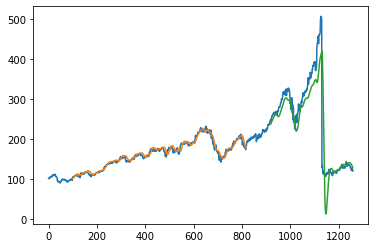

In [31]:
look_back = 100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back :len(train_predict) + look_back, :] = train_predict

testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back*2)+1 : len(df1) - 1, :] = test_predict

plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [40]:
len(test_data)

441

In [41]:
x_input = test_data[341:].reshape(1, -1)


In [42]:
x_input

array([[0.08192423, 0.07398677, 0.07420325, 0.07304871, 0.06898376,
        0.06167168, 0.06535177, 0.06381239, 0.06111846, 0.0594107 ,
        0.05943476, 0.06316296, 0.05017438, 0.06008419, 0.044546  ,
        0.04432952, 0.04834636, 0.05919423, 0.06900782, 0.06819002,
        0.06248948, 0.06164762, 0.07011425, 0.06944077, 0.06956103,
        0.07206254, 0.06987372, 0.06660253, 0.06806975, 0.06494287,
        0.05654841, 0.05972339, 0.06179194, 0.06313891, 0.06905592,
        0.07788334, 0.07874925, 0.07841251, 0.07675286, 0.08036079,
        0.08187613, 0.07562237, 0.0791341 , 0.0771377 , 0.07562237,
        0.09029465, 0.09012628, 0.09226699, 0.08734817, 0.0911365 ,
        0.09991581, 0.09770295, 0.10013229, 0.11148527, 0.10710764,
        0.10434155, 0.1018641 , 0.09397474, 0.09782321, 0.08721587,
        0.09760673, 0.10032471, 0.09294047, 0.09250752, 0.09753458,
        0.0927721 , 0.08851473, 0.09017438, 0.10027661, 0.11191822,
        0.11720986, 0.12647023, 0.1270475 , 0.12

In [51]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [50]:
temp_input

[array([0.08192423, 0.07398677, 0.07420325, 0.07304871, 0.06898376,
        0.06167168, 0.06535177, 0.06381239, 0.06111846, 0.0594107 ,
        0.05943476, 0.06316296, 0.05017438, 0.06008419, 0.044546  ,
        0.04432952, 0.04834636, 0.05919423, 0.06900782, 0.06819002,
        0.06248948, 0.06164762, 0.07011425, 0.06944077, 0.06956103,
        0.07206254, 0.06987372, 0.06660253, 0.06806975, 0.06494287,
        0.05654841, 0.05972339, 0.06179194, 0.06313891, 0.06905592,
        0.07788334, 0.07874925, 0.07841251, 0.07675286, 0.08036079,
        0.08187613, 0.07562237, 0.0791341 , 0.0771377 , 0.07562237,
        0.09029465, 0.09012628, 0.09226699, 0.08734817, 0.0911365 ,
        0.09991581, 0.09770295, 0.10013229, 0.11148527, 0.10710764,
        0.10434155, 0.1018641 , 0.09397474, 0.09782321, 0.08721587,
        0.09760673, 0.10032471, 0.09294047, 0.09250752, 0.09753458,
        0.0927721 , 0.08851473, 0.09017438, 0.10027661, 0.11191822,
        0.11720986, 0.12647023, 0.1270475 , 0.12

In [89]:
temp_input

[0.0649428743235117,
 0.056548406494287384,
 0.05972339146121464,
 0.06179194227300061,
 0.06313890559230306,
 0.06905592303066743,
 0.07788334335538183,
 0.07874924834636199,
 0.07841250751653633,
 0.07675285628382439,
 0.08036079374624172,
 0.08187612748045697,
 0.07562236921226695,
 0.0791340950090198,
 0.07713770294648226,
 0.07562236921226695,
 0.0902946482260974,
 0.0901262778111846,
 0.09226698737221883,
 0.08734816596512324,
 0.0911365003006614,
 0.09991581479254358,
 0.09770294648226097,
 0.10013229104028859,
 0.11148526758869509,
 0.10710763680096214,
 0.1043415514131088,
 0.10186410102224891,
 0.09397474443776305,
 0.0978232110643415,
 0.08721587492483462,
 0.09760673481659649,
 0.10032471437161755,
 0.09294046903187009,
 0.09250751653638006,
 0.09753457606734811,
 0.09277209861695729,
 0.08851473241130486,
 0.09017438364401681,
 0.10027660853878534,
 0.11191822008418523,
 0.11720986169573056,
 0.12647023451593503,
 0.1270475045099218,
 0.12440168370414911,
 0.11244738424533

In [52]:
len(temp_input)

100

In [99]:
np.array(temp_input[1:]).reshape(1, n_steps, 1)

array([[[0.05654841],
        [0.05972339],
        [0.06179194],
        [0.06313891],
        [0.06905592],
        [0.07788334],
        [0.07874925],
        [0.07841251],
        [0.07675286],
        [0.08036079],
        [0.08187613],
        [0.07562237],
        [0.0791341 ],
        [0.0771377 ],
        [0.07562237],
        [0.09029465],
        [0.09012628],
        [0.09226699],
        [0.08734817],
        [0.0911365 ],
        [0.09991581],
        [0.09770295],
        [0.10013229],
        [0.11148527],
        [0.10710764],
        [0.10434155],
        [0.1018641 ],
        [0.09397474],
        [0.09782321],
        [0.08721587],
        [0.09760673],
        [0.10032471],
        [0.09294047],
        [0.09250752],
        [0.09753458],
        [0.0927721 ],
        [0.08851473],
        [0.09017438],
        [0.10027661],
        [0.11191822],
        [0.11720986],
        [0.12647023],
        [0.1270475 ],
        [0.12440168],
        [0.11244738],
        [0

In [81]:
model.predict( x_input.reshape(1, 100, 1), verbose=0).tolist()

[[0.113700270652771]]

### Predicting For the next 30 data

In [103]:
# we are prediicting next 
from numpy import array

lst_output=[]
n_steps=100
i=0
    
while(i<10):
    if(len(temp_input)>100):
        x_input = np.array(temp_input[1:])
        print("{} day input {}".format(i, x_input))
        x_input = x_input.reshape(1,-1)
        x_input = x_input.reshape(1, n_steps, 1)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i, yhat))
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        temp_input = temp_input[1:]
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
    else:
        x_input = x_input.reshape(1, n_steps, 1)   # 1 for batch_size  100 for time_steps  1 for output dimensionality or(no of lstm in a layer)
        yhat = model.predict(x_input, verbose=0)
        print( yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
#print(lst_output)

0 day input [0.08916918 0.08714475 0.0856922  0.08481336 0.08444987 0.08451599
 0.08492035 0.08557881 0.08642077 0.08739118 0.08844966 0.08956847
 0.09072958 0.09192222 0.09314038 0.09438119 0.09564333 0.09692636
 0.09823001 0.09955391 0.10089745 0.10225981 0.10363996 0.10503677
 0.10644899 0.10787537 0.10931477 0.11076607 0.11222821 0.11370027
 0.11518144 0.1166709  0.11816805 0.11967229 0.12118302 0.1226998
 0.12422215 0.12574968 0.12728198 0.12881874 0.13035956 0.13190423
 0.13345234 0.13500367 0.13655792 0.13811482 0.13967413 0.14123562
 0.14279899 0.14436404 0.14593051 0.14749818 0.14906678 0.15063611
 0.15220591 0.15377598 0.15534601 0.15691584 0.15848519 0.16005383
 0.16162144 0.16318792 0.16475292 0.16631614 0.16787742 0.16943645
 0.17099297 0.17254665 0.17409734 0.17564467 0.17718844 0.17872828
 0.18026392 0.18179511 0.18332154 0.1848429  0.18635891 0.1878693
 0.18937366 0.19087178 0.19236331 0.19384797 0.1953254  0.19679536
 0.19825743 0.19971141 0.20115688 0.20259361 0.20402

8 day output [[0.23017685]]
9 day input [0.08739118 0.08844966 0.08956847 0.09072958 0.09192222 0.09314038
 0.09438119 0.09564333 0.09692636 0.09823001 0.09955391 0.10089745
 0.10225981 0.10363996 0.10503677 0.10644899 0.10787537 0.10931477
 0.11076607 0.11222821 0.11370027 0.11518144 0.1166709  0.11816805
 0.11967229 0.12118302 0.1226998  0.12422215 0.12574968 0.12728198
 0.12881874 0.13035956 0.13190423 0.13345234 0.13500367 0.13655792
 0.13811482 0.13967413 0.14123562 0.14279899 0.14436404 0.14593051
 0.14749818 0.14906678 0.15063611 0.15220591 0.15377598 0.15534601
 0.15691584 0.15848519 0.16005383 0.16162144 0.16318792 0.16475292
 0.16631614 0.16787742 0.16943645 0.17099297 0.17254665 0.17409734
 0.17564467 0.17718844 0.17872828 0.18026392 0.18179511 0.18332154
 0.1848429  0.18635891 0.1878693  0.18937366 0.19087178 0.19236331
 0.19384797 0.1953254  0.19679536 0.19825743 0.19971141 0.20115688
 0.20259361 0.20402111 0.20543925 0.20684765 0.20824602 0.20963401
 0.21101123 0.21237747

In [35]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [104]:
df3 = df1.tolist()
#df3.extend(lst_output)

ValueError: x and y must have same first dimension, but have shapes (100,) and (101, 1)

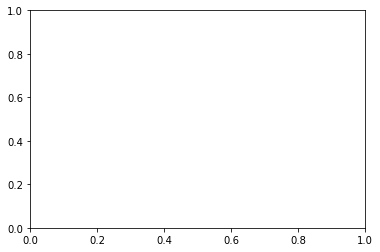

In [105]:
plt.plot(day_new, scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))


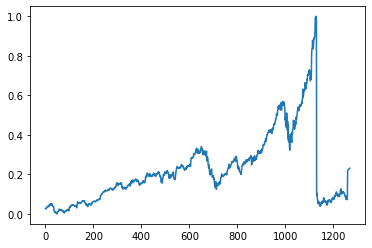

In [113]:
plt.plot(df3)

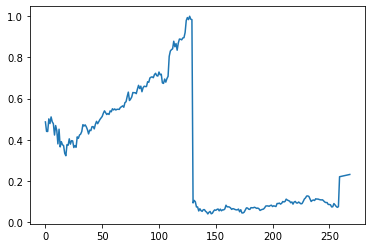

In [116]:
df3 = df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

In [ ]:
df3 = scaler.transform()